In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

In [4]:
from tensorflow.keras import models

num_classes = 6

model = Sequential([
    layers.Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),
    
    layers.Conv2D(64, (3, 3), strides=1, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),
    
    layers.Conv2D(16, (3, 3), strides=1, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),
    
    layers.Conv2D(2, (3, 3), strides=1, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
    
])

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9)

model.compile(optimizer = keras.optimizers.SGD(learning_rate=lr_schedule),
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [5]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Projects/BTP/dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

print('Train Set:')
train_set = train_datagen.flow_from_directory('/content/dataset/train',
                                             target_size=(256,256),
                                             batch_size=16,
                                             class_mode='sparse')

print("")

print('Test Set:')
test_set = test_datagen.flow_from_directory('/content/dataset/test',
                                           target_size=(256,256),
                                           batch_size = 16,
                                           class_mode='sparse',
                                           shuffle=False)

Train Set:
Found 10901 images belonging to 6 classes.

Test Set:
Found 2698 images belonging to 6 classes.


In [7]:
from tensorflow.keras.utils import to_categorical 

nb_train_samples = len(train_set.filenames) 
num_classes = len(train_set.class_indices) 
 
# get the class labels for the training data, in the original order 
train_labels = train_set.classes 
 
# convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=num_classes)

nb_test_samples = len(test_set.filenames) 
num_classes = len(test_set.class_indices) 
 
# get the class labels for the test data, in the original order 
test_labels = test_set.classes 
 
# convert the test labels to categorical vectors 
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [8]:
#checking labels are converted to vectors
print(train_labels)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [9]:
from tensorflow.keras.preprocessing import image

labels = ['0','1','2','3','4','5']

class_names = ['Fresh_Apple','Fresh_Banana','Fresh_Orange','Rotten_Apple','Rotten_Banana','Rotten_Orange']

print(train_labels[200])
print(class_names)

set_label = ""

for i in range(0,6):
    if train_labels[200][i]==1:
        set_label= set_label+class_names[i]
print(set_label)

[1. 0. 0. 0. 0. 0.]
['Fresh_Apple', 'Fresh_Banana', 'Fresh_Orange', 'Rotten_Apple', 'Rotten_Banana', 'Rotten_Orange']
Fresh_Apple


Found 10901 images belonging to 6 classes.


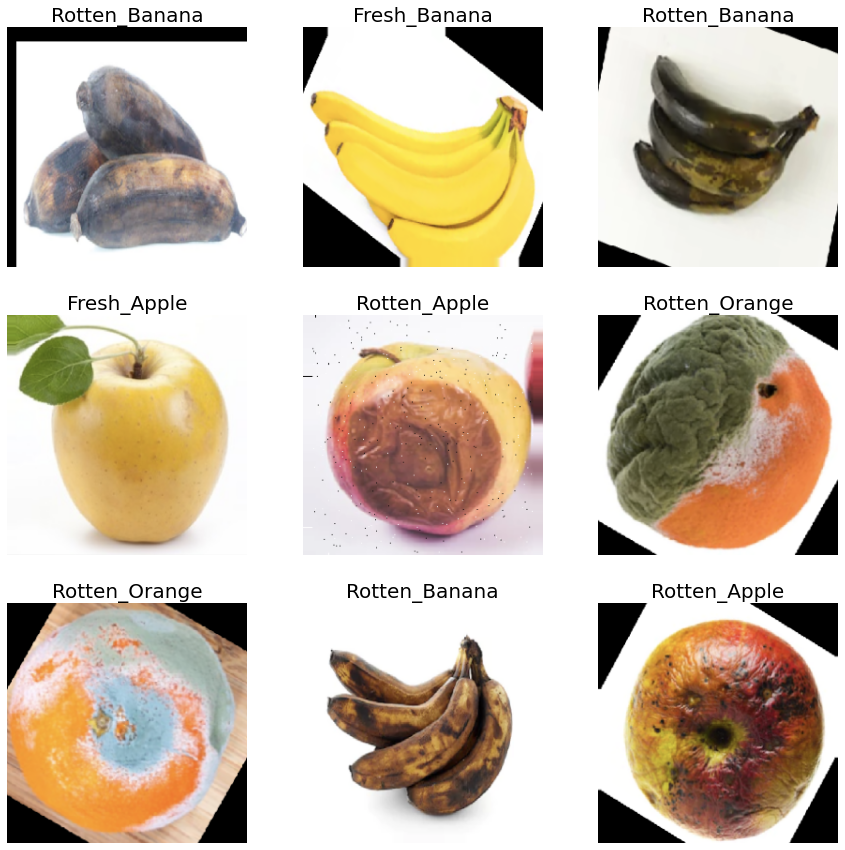

In [12]:
#checking train labels and images randomly

import matplotlib.pyplot as plt

train_set_check = train_datagen.flow_from_directory('/content/dataset/train',
                                             target_size=(256,256),
                                             batch_size=32,
                                             class_mode='sparse', shuffle=True)

plt.figure(figsize=(15, 15))

batch=next(train_set_check)  

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img=batch[0][i]                            
    plt.imshow(img)
    lab = int(batch[1][i])
    plt.title(class_names[lab], fontsize=20)
    plt.axis("off")

In [13]:
epochs=10
history = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=epochs,
  steps_per_epoch=200
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
200/200 [==============================] - 1474s 7s/step - loss: 1.7816 - accuracy: 0.2231 - val_loss: 1.7945 - val_accuracy: 0.1412
Epoch 2/10
200/200 [==============================] - 1473s 7s/step - loss: 1.7509 - accuracy: 0.3352 - val_loss: 1.7671 - val_accuracy: 0.2965
Epoch 3/10
200/200 [==============================] - 1506s 8s/step - loss: 1.7358 - accuracy: 0.3193 - val_loss: 1.7234 - val_accuracy: 0.3410
Epoch 4/10
200/200 [==============================] - 1500s 8s/step - loss: 1.7197 - accuracy: 0.3420 - val_loss: 1.7063 - val_accuracy: 0.3525
Epoch 5/10
200/200 [==============================] - 1556s 8s/step - loss: 1.7085 - accuracy: 0.3313 - val_loss: 1.6844 - val_accuracy: 0.3540
Epoch 6/10
200/200 [==============================] - 1526s 8s/step - loss: 1.6938 - accuracy: 0.3572 - val_loss: 1.6735 - val_accuracy: 0.3603
Epoch 7/10
200/200 [==============================] - 1546s 8s/step - loss: 1.6774 - accuracy: 0.3471 - val_loss: 1.6581 - val_accuracy:

In [14]:
model.save('my_model_1.h5') 

In [15]:
import numpy as np

np.save('my_history_1.npy',history.history)

In [16]:
model_2 = tensorflow.keras.models.load_model('my_model_1.h5')

In [17]:
epochs=10
history_2 = model_2.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=epochs,
  steps_per_epoch=200
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
200/200 [==============================] - 1539s 8s/step - loss: 1.6173 - accuracy: 0.4025 - val_loss: 1.5933 - val_accuracy: 0.4088
Epoch 2/10
200/200 [==============================] - 1544s 8s/step - loss: 1.6061 - accuracy: 0.4144 - val_loss: 1.5725 - val_accuracy: 0.4433
Epoch 3/10
200/200 [==============================] - 1508s 8s/step - loss: 1.5850 - accuracy: 0.4284 - val_loss: 1.5548 - val_accuracy: 0.4281
Epoch 4/10
200/200 [==============================] - 1485s 7s/step - loss: 1.5669 - accuracy: 0.4387 - val_loss: 1.5716 - val_accuracy: 0.4548
Epoch 5/10
200/200 [==============================] - 1494s 7s/step - loss: 1.5526 - accuracy: 0.4512 - val_loss: 1.5137 - val_accuracy: 0.4507
Epoch 6/10
200/200 [==============================] - 1490s 7s/step - loss: 1.5311 - accuracy: 0.4559 - val_loss: 1.5132 - val_accuracy: 0.4500
Epoch 7/10
200/200 [==============================] - 1487s 7s/step - loss: 1.5178 - accuracy: 0.4509 - val_loss: 1.4806 - val_accuracy:

In [18]:
model_2.save('my_model_2.h5') 

In [19]:
import numpy as np

np.save('my_history_2.npy',history_2.history)